In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import numpy as np

%matplotlib inline  

Loading references as previously extracted:

In [2]:
references = pd.read_csv('data/References.csv', index_col=0)

In [3]:
references.head()

,ref,file,ref_parsed,year,identifier
0,"Lave, J., & Wenger, E. (1991). Situated learni...",import2018_371,"Lave, J., & Wenger, E. (1991)",1991.0,"Lave, J., & Wenger, E. (1991). Situated learni..."
1,"Miles, M. B., Huberman, A. M., & Saldana, J. (...",import2018_371,"Miles, M. B., Huberman, A. M., & Saldana, J. (...",2013.0,"Miles, M. B., Huberman, A. M., & Saldana, J. (..."
2,"Pea, R. D., Gomez, L. M., Edelson, D. C., Fish...",import2018_371,"Pea, R. D., Gomez, L. M., Edelson, D. C., Fish...",1997.0,"Pea, R. D., Gomez, L. M., Edelson, D. C., Fish..."
3,"Rogoff, B. (1995). Observing sociocultural act...",import2018_371,"Rogoff, B. (1995)",1995.0,"Rogoff, B. (1995). Observing sociocultural act..."
4,"Shirk, J., Ballard, H., Wilderman, C., Phillip...",import2018_371,"Shirk, J., Ballard, H., Wilderman, C., Phillip...",2012.0,"Shirk, J., Ballard, H., Wilderman, C., Phillip..."


Some sample references, and their corresponding identifier:

In [4]:
sample = references[['ref', 'identifier']].sample(4)
[print("ref: ",r, '\nidentifier: ', s,) for r, s in zip(sample.ref.tolist(), sample.identifier.tolist())]

ref:  Penuel, W.R., Fishman, B.J., Haugan Cheng, B., & Sabelli, N. (2011). Organizing research and development at the intersection of learning, implementation, and design. Educational Researcher, 40(7), 331-337. 
identifier:  Penuel, W.R., Fishman, B.J., Haugan Cheng, B., & Sabelli, N. (2011). Organizing research and development at the intersection of learning, implementation, and design
ref:  Hall, R., & Rubin, A. (1998). There’s five little notches in here: Dilemmas in teaching and learning the conventional structure of rate. Thinking practices in mathematics and science learning, 189-235. 
identifier:  Hall, R., & Rubin, A. (1998). There’s five little notches in here: Dilemmas in teaching and learning the conventional structure of rate
ref:  Penuel, W. R. (2014). Emerging forms of formative intervention research in education. Mind, Culture, and Activity, 21(2), 97-117. 
identifier:  Penuel, W. R. (2014). Emerging forms of formative intervention research in education
ref:  Hargrave, 

[None, None, None, None]

### First we check the most cited citations:

Lave, J., & Wenger, E. (1991). Situated learning: Legitimate peripheral participation                                          32
Scardamalia, M. (2002). Collective cognitive responsibility for the advancement of knowledge                                   32
Jordan, B., & Henderson, A. (1995). Interaction analysis: Foundations and practice                                             31
Scardamalia, M., & Bereiter, C. (2006). Knowledge building: Theory, pedagogy, and technology                                   23
Papert, S. (1980). Mindstorms: Children, computers, and powerful ideas                                                         20
Barron, B. (2003). When smart groups fail                                                                                      19
Bereiter, C. (2002). Education and mind in the knowledge age                                                                   16
Vygotsky, L. S. (1978). Mind in society: The development of higher psychological processes

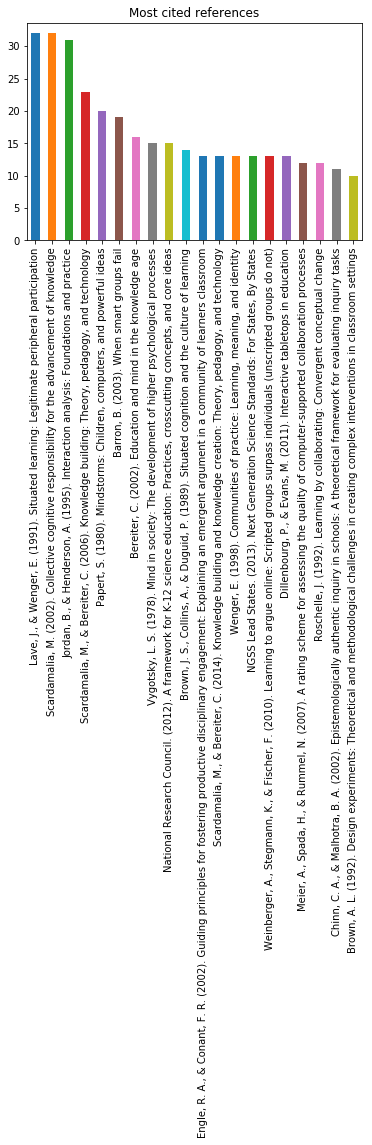

In [5]:
plt.title('Most cited references')
references.identifier.value_counts().head(20).plot(kind='bar')
references.identifier.value_counts().head(10)

### We look at how the references are distributed over the years:

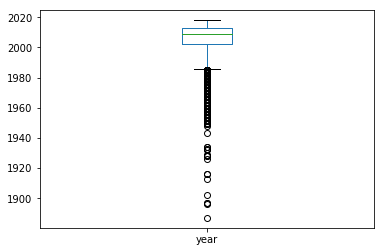

In [6]:
references.year.plot(kind='box')

### Looking at authors in dataset & the ones they reference

Load the metadata:

In [7]:
metadata = pd.read_csv('data/Parsed_metadata.csv', index_col=0)

In [8]:
reference_authors = pd.read_csv('data/Reference_authors.csv', index_col=0)
reference_authors.shape

(45194, 6)

In [9]:
reference_authors.drop_duplicates(inplace=True)
reference_authors.shape

(34634, 6)

In [10]:
reference_authors.head()

,ref,file,ref_parsed,year,identifier,author
0,"Lave, J., & Wenger, E. (1991). Situated learni...",import2018_371,"Lave, J., & Wenger, E. (1991)",1991.0,"Lave, J., & Wenger, E. (1991). Situated learni...",Lave J.
1,"Miles, M. B., Huberman, A. M., & Saldana, J. (...",import2018_371,"Miles, M. B., Huberman, A. M., & Saldana, J. (...",2013.0,"Miles, M. B., Huberman, A. M., & Saldana, J. (...",Miles M. B.
2,"Pea, R. D., Gomez, L. M., Edelson, D. C., Fish...",import2018_371,"Pea, R. D., Gomez, L. M., Edelson, D. C., Fish...",1997.0,"Pea, R. D., Gomez, L. M., Edelson, D. C., Fish...",Pea R. D.
3,"Rogoff, B. (1995). Observing sociocultural act...",import2018_371,"Rogoff, B. (1995)",1995.0,"Rogoff, B. (1995). Observing sociocultural act...",Rogoff B.
4,"Shirk, J., Ballard, H., Wilderman, C., Phillip...",import2018_371,"Shirk, J., Ballard, H., Wilderman, C., Phillip...",2012.0,"Shirk, J., Ballard, H., Wilderman, C., Phillip...",Shirk J.


We check the most cited author:

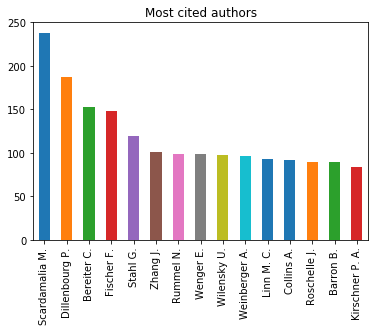

In [11]:
plt.title('Most cited authors')
reference_authors.author.value_counts().head(15).plot(kind='bar')

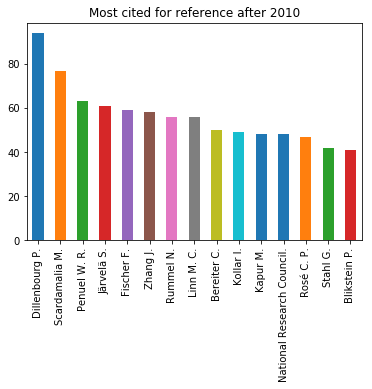

In [12]:
plt.title('Most cited for reference after 2010')
reference_authors[reference_authors.year > 2010].author.value_counts().head(15).plot(kind='bar')

We now merge on the shortened name as it can be found in the citation.

**Note** that we might get illegitemate merges, as the short name is not unique, even within the metadata dataset!

In [13]:
reference_edges = pd.merge(metadata, reference_authors, on='file')

reference_edges.sample(2)

,file,subject,iso,uri,type,publisher,title,issued,accessioned,citation,available,abstract,long_name,author_order,shortend_names,ref,ref_parsed,year,identifier,author
45824,import2015short_280,"['active learning', 'peer instruction', 'desig...",en,https://doi.dx.org/10.22318/cscl2015.280,Book chapter,International Society of the Learning Science...,Beyond and Within Classroom Walls: Designing P...,2015-07,2017-06-19 14:15:51+00:00,"Charles, E. S., Lasry, N., Whittaker, C., Dugd...",2017-06-19 14:15:51+00:00,"This paper tells the story of DALITE, a design...","Bhatnagar, Sameer",5,Dugdale M.,"Hestenes, D., Wells, M., & Swackhamer, G. (199...","Hestenes, D., Wells, M., & Swackhamer, G. (1992)",1992.0,"Hestenes, D., Wells, M., & Swackhamer, G. (199...",Wells M.
6239,import2016full_10,NaN,en,info:doi/10.22318/icls2016.10,Book chapter,Singapore: International Society of the Learni...,Combining Exploratory Learning With Structured...,2016-07,2017-03-21 12:05:42+00:00,"Rummel, N., Mavrikis, M., Wiedmann, M., Loibl,...",2017-03-21 12:05:42+00:00,Robust domain knowledge consists of conceptual...,"Hansen, Alice",6,Loibl K.,"Mazziotti, C., Holmes, W., Wiedmann, M., Loibl...","Mazziotti, C., Holmes, W., Wiedmann, M., Loibl...",2015.0,"Mazziotti, C., Holmes, W., Wiedmann, M., Loibl...",Grawemeyer B.


In [14]:
reference_edges.rename(columns={'shortend_names': 'author', 'author': 'cited'}, inplace=True)

#### Self citations:

In [15]:
reference_edges[reference_edges.author == reference_edges.cited].author.value_counts().head()

Zhang J.           80
Rummel N.          61
Trausan-Matu S.    50
Sharma K.          35
Kollar I.          27
Name: author, dtype: int64

### Number of authors in and out of conference

In and out of conference citations, quick calculation:

In [16]:
print('Number of distinct authors ', len(reference_edges.author.unique()))
print('Number of distinct cited authors by some author in the conference ', len(reference_edges.cited.unique()))
print('Number of authors that where cited by an other author in the confernce :' , len(set(reference_edges.cited.tolist()).intersection(set(reference_edges.author.tolist()))))

Number of distinct authors  1444
Number of distinct cited authors by some author in the conference  13224
Number of authors that where cited by an other author in the confernce : 806


In [17]:
reference_edges = reference_edges[['cited', 'author', 'year', 'ref']][reference_edges.year.notna()]

In [18]:
match_conference = ' JLS |Journal of the Learning Sciences|CSCL|ICLS|ijCSCL|Computer Supported Collaborative Learning'
re.search(match_conference,' ICLS')

<re.Match object; span=(1, 5), match='ICLS'>

In [19]:
mask_c_s = reference_edges.ref.map(lambda x: True if re.search(match_conference, x) else False)

In [20]:
in_conference = set(reference_edges[mask_c_s].cited.unique())

We limit the range of years to get people that are still "active"

In [21]:
not_in_conference = list(set(reference_edges[reference_edges.year > 2010].cited) - in_conference.union(set(reference_edges.author)))

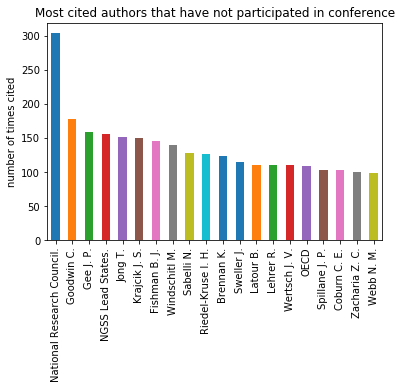

In [36]:
#todo: filter out organisations
plt.title('Most cited authors that have not participated in conference')
plt.ylabel('number of times cited')
reference_edges[reference_edges.cited.isin(not_in_conference)].cited.value_counts().head(20).plot(kind = 'bar')

In [23]:
reference_edges[(reference_edges.cited.isin(not_in_conference)) & (reference_edges.cited == 'Goodwin C.')].ref.sample(4).tolist()

['Streeck, J., Goodwin, C., & LeBaron, C. D. (Eds.). (2011). Embodied interaction\u2009\u202f: language and body in the material world. New York: Cambridge University Press.',
 'Goodwin, C. (2003). Conversational frameworks for the accomplishment of meaning in aphasia. Conversation and brain damage, 90-116.',
 'Goodwin, C. (2013). The co-operative, transformative organization of human action and knowledge. Journal of pragmatics, 46(1), 8-23.',
 'Goodwin, C., & Heritage, J. (1990). Conversation analysis. Annual review of anthropology, 19(1), 283-307.']

In [24]:
reference_edges[(reference_edges.cited.isin(not_in_conference)) & (reference_edges.cited == 'Gee J. P.')].ref.sample(4).tolist()

['Moss, P. A., Pullin, D. C., Gee, J. P., Haertel, E. H., & Young, L. J. (2008). Assessment, equity, and opportunity to learn. Cambridge, MA: Cambridge University Press.',
 'Gee, J. P. (2007). Good videogames and good learning: Collected essays on video games. New York, NY: Peter Lang Publishing.',
 'Gee, J. P., & Hayes, E. (2011). Nurturing affinity spaces and game-based learning. In C. Steinkuehler, K. Squire, & S. Barab (Eds.), Games, learning, and society: Learning and meaning in the digital age (pp. 129–153). New York, NY: Cambridge University Press.',
 'Gee, J. P. (2015). Accountable talk and learning in popular culture: The game/affinity paradigm. In L. B. Resnick, C. Asterhan, & S. N. Clarke (Eds.) (in press). Socializing intelligence through academic talk and dialogue (pp. 197–204). Washington, DC: American Educational Research Association.']

# Building the refrence graph:

directed graph weighted by number of times x cited y:

In [25]:
mapping_long = {}
for i, l in metadata[['shortend_names', 'long_name']].iterrows():
    mapping_long[l.shortend_names] = l.long_name

In [26]:
nodes = pd.DataFrame(reference_edges.author.drop_duplicates().reset_index(drop=True)).reset_index()

In [27]:
edges = pd.merge(nodes, reference_edges, left_on='author', right_on='cited')

In [28]:
author_dict = nodes.author.to_dict()
author_dict = {v: k for k, v in author_dict.items()}

In [29]:
edges['author'] = edges.author_x.map(author_dict)
edges['citation'] = edges.author_y.map(author_dict)

In [30]:
n_nodes = len(nodes)
adjacency = np.zeros((n_nodes, n_nodes), dtype=int)

for idx, row in edges.iterrows():
    if np.isnan(row.author):
        continue
    i, j = int(row.author), int(row.citation)
    adjacency[j, i] += 1

In [31]:
adjacency.shape

(1444, 1444)

In [32]:
degrees = np.where(adjacency > 0, 1, 0).sum(axis=0)

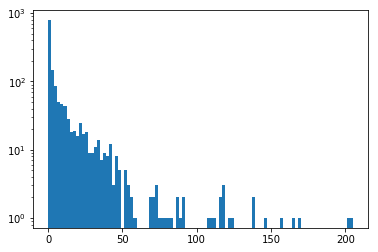

In [33]:
plt.hist(degrees, bins=100, log=True)
plt.show()

In [34]:
import networkx as nx

graph = nx.from_numpy_array(adjacency)

mapping = nodes.author.to_dict()

H=nx.relabel_nodes(graph,mapping)
print(sorted(H.nodes()))

nx.write_gexf(H, 'data/refrence_graph.gexf')

[' Adams', ' Barnes', ' Bedell', ' Ben-Horin', ' C. P.', ' Clark', ' F.', ' J.', ' J. Z.', ' Kali', ' Kirschner', ' M.', ' S.', ' Swearingen', ' Virk', '-Tarhonen J.', 'Aalst J.', 'Abdu R.', 'Abelson H.', 'Abrahamson D.', 'Acharya A.', 'Acosta A.', 'Adams J. A.', 'Adams J. D.', 'Adanır G. A.', 'Aditomo A.', 'Agarwal P.', 'Agrawal H.', 'Ahn J.', 'Ainsworth S.', 'AlQahtani M.', 'Alameh S.', 'Albrecht J.', 'Aleven V.', 'Allen C. D.', 'Allen L.', 'Allert H.', 'Almatrafi O.', 'Alozie N.', 'Alqassab M.', 'Alstyne R.', 'Amzalag M.', 'Anderson A.', 'Anderson C. G.', 'Anderson C. W.', 'Anderson E.', 'Anderson J.', 'Anderson R. K.', 'Anderson T. D.', 'Anderson-Levitt K.', 'Andrade A.', 'Andrews C. J.', 'Andrews J. J.', 'Angelo C.', 'Angelo S.', 'Angersbach J.', 'Anjewierden A.', 'Antle A. N.', 'Anton G.', 'Apollonia S.', 'Applebaum L.', 'Applebaum L. R.', 'Arastoopour G.', 'Archibeque B. A.', 'Arend B.', 'Arias A. M.', 'Arnedillo-Sanchez I.', 'Arnseth H. C.', 'Arukovic S.', 'Arvaja M.', 'Arvidss